## 0 Load module

In [1]:
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean as cmo

## 1 Load data
### 1.1 Load NSIDC obs

In [2]:
# file NSIDC
fidnsidcm09=nc.Dataset('DATA/NSIDC/seaice_conc_monthly_sh_2009-2018m09.nc')
fidnsidcm02=nc.Dataset('DATA/NSIDC/seaice_conc_monthly_sh_2009-2018m02.nc')

sicm09_nsidc=fidnsidcm09.variables['seaice_conc_monthly_cdr'][0,:,:]
sicm02_nsidc=fidnsidcm02.variables['seaice_conc_monthly_cdr'][0,:,:]
lat_nsidc=fidnsidcm02.variables['latitude'][:,:]
lon_nsidc=fidnsidcm02.variables['longitude'][:,:]
lon_nsidc[lon_nsidc>=180] = lon_nsidc[lon_nsidc>=180.] - 360.
delta_lon=np.abs(np.diff(lon_nsidc))
for i, start in enumerate(np.argmax(delta_lon > 180, axis=1)):
    lon_nsidc[i, start] = np.nan

### 1.2 Load model outputs

In [3]:
fidNEMOm09=nc.Dataset('DATA/OPM026/eORCA025.L121-OPM026_y2009m09.10y_icemod.nc')
fidNEMOm02=nc.Dataset('DATA/OPM026/eORCA025.L121-OPM026_y2009m02.10y_icemod.nc')

sicm09_NEMO=fidNEMOm09.variables['siconc'][0,:,:]
sicm02_NEMO=fidNEMOm02.variables['siconc'][0,:,:]
lat_nemo=fidNEMOm09.variables['nav_lat'][:,:]
lon_nemo=fidNEMOm09.variables['nav_lon'][:,:]
lon_nemo[lon_nemo>=180] = lon_nemo[lon_nemo>=180.] - 360.
delta_lon=np.abs(np.diff(lon_nemo))
for i, start in enumerate(np.argmax(delta_lon > 180, axis=1)):
    lon_nemo[i, start+1:] += 360

## 2 Plot figure
### 2.1 Define constant variables used for plotting

#### 2.1.1 Natural earth contour line

In [ ]:
dfeature={'isf':cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m', facecolor='none'),
            'lakes':cartopy.feature.NaturalEarthFeature('physical', 'lakes'                    , '50m', facecolor='none'),
            'coast':cartopy.feature.NaturalEarthFeature('physical', 'coastline'                , '50m', facecolor='0.75'),
            'land' :cartopy.feature.NaturalEarthFeature('physical', 'land'                     , '50m', facecolor='0.75'),
            'bathy_z1000':cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_J_1000'  , '10m', facecolor='none'),
            'bathy_z2000':cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_I_2000'  , '10m', facecolor='none'),
            'bathy_z3000':cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_H_3000'  , '10m', facecolor='none')
            }

#### 2.1.2 Projection, extent, colormap and contour definitions

In [12]:
# projection definition
proj =ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0)
XY_lim=[(-180, 180, -90, -50),ccrs.PlateCarree()]

# colormap
cmap = plt.get_cmap(cmo.cm.ice,20)

# 15% ice contour
lvls=[0.15, 1.15]

# axes init
ax=[None]*2

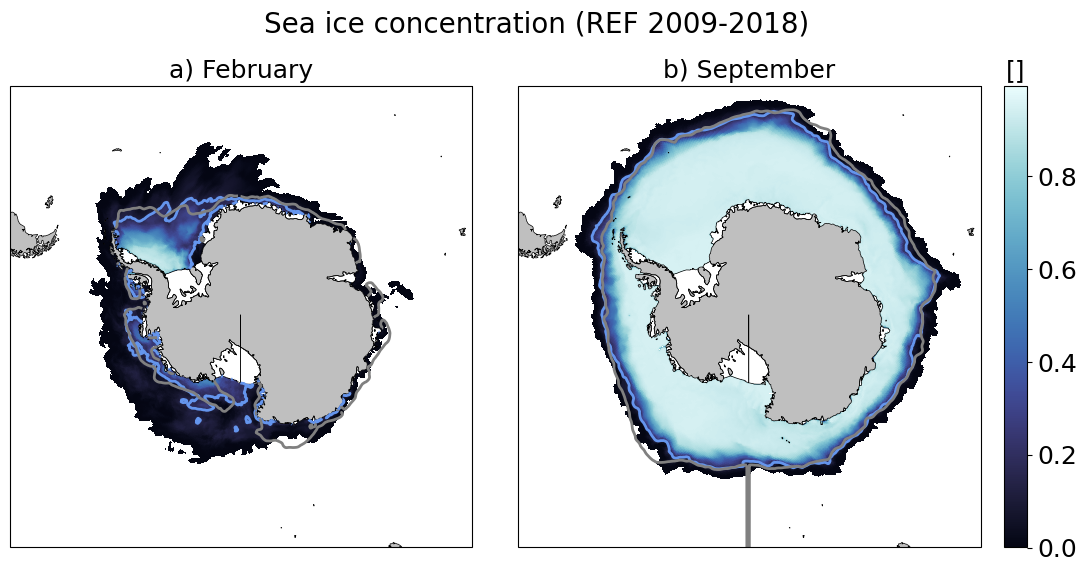

In [11]:
fig=plt.figure(figsize=np.array([297,297*1/2]) / 25.4)
fig.suptitle('Sea ice concentration (REF 2009-2018)',fontsize=20)
gs = fig.add_gridspec(1, 2)

#====================================================================================================
# plot February
ax[0] = fig.add_subplot(gs[0,0], projection=proj)
ax[0].set_title('a) February',fontsize=18)
pcol = ax[0].pcolormesh(lon_nemo,lat_nemo,sicm02_NEMO, transform=ccrs.PlateCarree(),cmap=cmap, rasterized=True)
ax[0].contour(lon_nemo,lat_nemo,sicm02_NEMO, levels=lvls,transform=ccrs.PlateCarree(),colors='cornflowerblue',linewidths=2)
ax[0].contour(lon_nsidc,lat_nsidc,sicm02_nsidc, levels=lvls,transform=ccrs.PlateCarree(),colors='gray',linewidths=2)
ax[0].set_extent(XY_lim[0], XY_lim[1])
ax[0].add_feature(dfeature['land'],linewidth=0.5,edgecolor='k')
ax[0].add_feature(dfeature['isf'],linewidth=0.5,edgecolor='k')

#====================================================================================================
# plot September
ax[1] = fig.add_subplot(gs[0,1], projection=proj)
ax[1].set_title('b) September',fontsize=18)
pcol = ax[1].pcolormesh(lon_nemo,lat_nemo,sicm09_NEMO, cmap=cmap, transform=ccrs.PlateCarree(), rasterized=True)
ax[1].contour(lon_nemo,lat_nemo,sicm09_NEMO, levels=lvls,transform=ccrs.PlateCarree(),colors='cornflowerblue',linewidths=2)
ax[1].contour(lon_nsidc,lat_nsidc,sicm09_nsidc, levels=lvls,transform=ccrs.PlateCarree(),colors='gray',linewidths=2)
ax[1].set_extent(XY_lim[0], XY_lim[1])
ax[1].add_feature(dfeature['land'],linewidth=0.5,edgecolor='k')
ax[1].add_feature(dfeature['isf'],linewidth=0.5,edgecolor='k')

#====================================================================================================
# Adjuste white space
fig.subplots_adjust(left=0.05,right=0.88, bottom=0.06, top=0.85, wspace=0.1, hspace=0.041)

#====================================================================================================
# Adjuste colorbar
#   get plot indexes
x0=1.0; x1=0.0; y0=1.0; y1=0.0
for iplt in range(0,2):
    ax[iplt].apply_aspect()
    zbox=ax[iplt].get_position()
    box=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
    x0=np.min([x0,box[0]])
    x1=np.max([x1,box[1]])
    y0=np.min([y0,box[2]])
    y1=np.max([y1,box[3]])
boxxy=[x0, y0, x1, y1]

#   plot colorbar at specific location
cax  = plt.axes([boxxy[2]+0.02, boxxy[1], 0.02, boxxy[3]-boxxy[1]])
cbar = plt.colorbar(pcol, cax=cax)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_title('[]',fontsize=18,y=1.0)

#====================================================================================================
# save figure
fig.savefig('fig03.png', format='png', dpi=150)